In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/stress data.csv")


In [4]:
print(df.head())


   Age  Systolic_Pressure  Diastolic_Pressure  Heart_Rate      Weight  \
0   56                110                  65          74   77.057835   
1   69                125                 117          99   85.789282   
2   46                162                  81          71   84.462784   
3   32                158                  85          79   90.409532   
4   60                126                  62          69  110.590400   

     Height        BMI  Stress_Score  Stress_Level  
0  1.941457  20.443774     -9.555623             2  
1  1.829523  25.630521     22.763052             5  
2  1.605616  32.762879     18.276288             4  
3  1.931498  24.234023     19.023402             4  
4  1.943047  29.292129     -4.470787             2  


In [5]:
print(df.isnull().sum())


Age                   0
Systolic_Pressure     0
Diastolic_Pressure    0
Heart_Rate            0
Weight                0
Height                0
BMI                   0
Stress_Score          0
Stress_Level          0
dtype: int64


In [6]:
X = df.drop('Stress_Level', axis=1)
y = df['Stress_Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)



In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
log_reg = LogisticRegression()


In [9]:
log_reg.fit(X_train, y_train)
LogisticRegression()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred = log_reg.predict(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [13]:
Age = float(input("Enter age: "))
Systolic_Pressure = float(input("Enter Systolic pressure: "))
Diastolic_Pressure = float(input("Enter Diastolic pressure: "))
Heart_Rate = float(input("Enter Heart rate: "))
Weight = float(input("Enter weight: "))
Height = float(input("Enter height: "))


Enter age: 67
Enter Systolic pressure: 90
Enter Diastolic pressure: 89
Enter Heart rate: 97
Enter weight: 60
Enter height: 1.77


In [14]:
BMI = Weight / (Height * Height)
Stress_Score = 0.4 * (Systolic_Pressure - 120) + 0.4 * (Diastolic_Pressure - 80) + 0.2 * (Heart_Rate - 70) + 0.1 * (BMI - 24)


In [15]:
data = {
    "Age": [Age],
    "Systolic_Pressure": [Systolic_Pressure],
    "Diastolic_Pressure": [Diastolic_Pressure],
    "Heart_Rate": [Heart_Rate],
    "Weight": [Weight],
    "Height": [Height],
    "BMI": [BMI],
    "Stress_Score": [Stress_Score]
}
input_data = pd.DataFrame(data)
input_data_scaled = scaler.transform(input_data)


In [16]:
prediction = log_reg.predict(input_data_scaled)
print("Predicted Stress Level:", prediction[0])


Predicted Stress Level: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


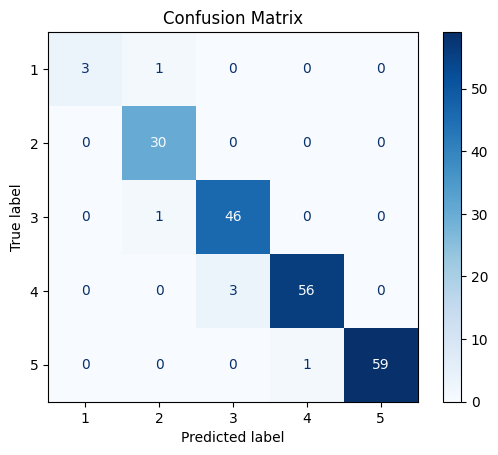

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [20]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")


Precision: 0.97


In [21]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")


Recall: 0.97


In [22]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.97
